In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
%matplotlib inline

In [2]:
## open csv in sublime save as utf8 encoded

df = pd.read_csv('/Users/mba/projects/mass_shootings/mass_shootings.csv', encoding = 'utf8')

## Are mass shootings getting worse?
* Are mass shooting casualties increasing?
    * are mass shooting deaths increasing?
    * are mass shootings becoming more deadly?
* Are mass shootings more frequent?
* Are mass shootings more severe?


* look at demographics
    * age
    * gender
    * race

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Data columns (total 21 columns):
S#                      323 non-null int64
Title                   323 non-null object
Location                278 non-null object
Date                    323 non-null object
Incident Area           261 non-null object
Open/Close Location     295 non-null object
Target                  318 non-null object
Cause                   246 non-null object
Summary                 323 non-null object
Fatalities              323 non-null int64
Injured                 323 non-null int64
Total victims           323 non-null int64
Policeman Killed        317 non-null float64
Age                     179 non-null object
Employeed (Y/N)         67 non-null float64
Employed at             41 non-null object
Mental Health Issues    323 non-null object
Race                    321 non-null object
Gender                  323 non-null object
Latitude                303 non-null float64
Longitude         

In [4]:
## rename all cols to lower case, and replace ' ' with '_'

cols = df.columns.tolist()
cols_rn = [col.lower().replace(' ', '_') for col in cols]
cols = zip(cols, cols_rn)
mydict = {}
for col in cols:
    mydict[col[0]] = col[1]
df.rename(columns=mydict, inplace=True)

In [5]:
## change data to date time and create a 'year' feature
## rename columns

df['date'] = pd.to_datetime(df['date'])
df['year'] = df.loc[:, 'date'].apply(lambda x: x.year)
df.rename(columns={'s#':'incident_ct', 
                   'total_victims': 'total_casualties',
                   'employeed_(y/n)':'employed'
                  }, inplace=True)

In [6]:
## group by 5 year increments

df['year_5'] = df['year'].apply(lambda x: x - 1965)
df['year_5'] = df['year_5'].apply(lambda x: (x // 5))
df['year_5'] = df['year_5'].apply(lambda x: (x * 5) + 1965)
df_year_5 = df.groupby('year_5', as_index=False).agg({'fatalities': 'sum', 'injured': 'sum', 
                                                 'total_casualties': 'sum', 'incident_ct': 'count'})
df_year_5['casualties_per_incident'] = df_year_5.loc[:, 
                        ['total_casualties', 'incident_ct']].apply(lambda x: x[0] / x[1], axis=1)

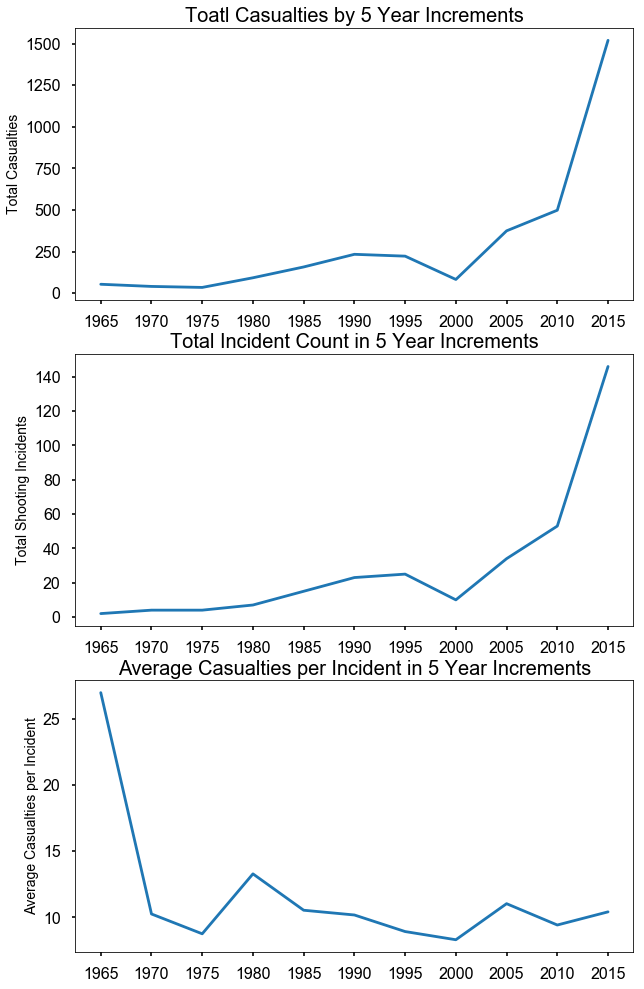

In [12]:
## charts by year for total casualties, number of incidents, and average casualties per incident

dims = (10,17)
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=dims)
plt.setp(axes, xticks=np.arange(min(df_year_5['year_5']), max(df_year_5['year_5']) + 5, 5))
plt.style.use('seaborn-dark')


axes[0].plot(df_year_5['year_5'], df_year_5['total_casualties'])
axes[0].set_ylabel('Total Casualties', fontsize=14)
axes[0].set_title('Toatl Casualties by 5 Year Increments', fontsize=20)

axes[1].plot(df_year_5['year_5'], df_year_5['incident_ct']);
axes[1].set_ylabel('Total Shooting Incidents', fontsize = 14)
axes[1].set_title('Total Incident Count in 5 Year Increments', fontsize = 20);


axes[2].plot(df_year_5['year_5'], df_year_5['casualties_per_incident']);
axes[2].set_ylabel('Average Casualties per Incident', fontsize = 14)
axes[2].set_title('Average Casualties per Incident in 5 Year Increments', fontsize = 20);

In [8]:
## look at deaths as a percent of casualties

df_year_5['death_pct'] = df_year_5[['fatalities', 'total_casualties']].apply(lambda x: x[0] / x[1], axis=1)

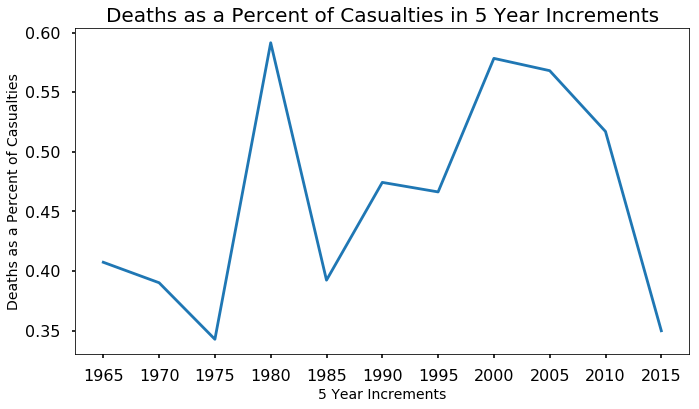

In [9]:
## chart to show if there is any pattern of increases in fatalities over time

dims = (11, 6)
fig, ax = plt.subplots(figsize=dims)
plt.style.use('seaborn-poster')

plt.plot(df_year_5['year_5'], df_year_5['death_pct']);
ax.set_xlabel('5 Year Increments', fontsize = 14)
ax.set_ylabel('Deaths as a Percent of Casualties', fontsize = 14)
ax.set_title('Deaths as a Percent of Casualties in 5 Year Increments', fontsize = 20);
plt.xticks(np.arange(min(df_year_5['year_5']), max(df_year_5['year_5']) + 5, 5));

In [10]:
df.columns.tolist()

['incident_ct',
 'title',
 'location',
 'date',
 'incident_area',
 'open/close_location',
 'target',
 'cause',
 'summary',
 'fatalities',
 'injured',
 'total_casualties',
 'policeman_killed',
 'age',
 'employed',
 'employed_at',
 'mental_health_issues',
 'race',
 'gender',
 'latitude',
 'longitude',
 'year',
 'year_5']

In [11]:
## set up table to show demographic charts
## age, gender, race

df.head()
df_demo = df.groupby(['year_5', 'age', 'gender', 'race', 'employed']).agg({
    'fatalities':sum,
    'total_casualties':sum,
    'incident_ct':count,
    
}

SyntaxError: unexpected EOF while parsing (<ipython-input-11-b339052b7e0b>, line 10)